### Clustering analysis: 1 hour, single period

##### Hourly BTC chart

In [1]:
from algom.utils.data_object import dataObject
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np


<br>

#### Load OHLC input data

In [2]:
data = dataObject("""
WITH agg AS (
    SELECT
    ticker_time_sec,
    ticker_time,
    ticker,
    `interval`,
    exchange,

    MAX(week)  AS week,
    MAX(month) AS month,
    MAX(quarter) AS quarter,
    MAX(year)  AS year,
    MAX(close) AS close,
    MAX(high)  AS high,
    MAX(low)   AS low,
    MAX(open)  AS open,
    MAX(volume_base) AS volume_base,
    MAX(volume) AS volume,

    MAX(ROR_n1)  AS ROR_n1,
    MAX(ROR_n2)  AS ROR_n2,
    MAX(ROR_n3)  AS ROR_n3,
    MAX(ROR_n6)  AS ROR_n6,
    MAX(ROR_n9)  AS ROR_n9,
    MAX(ROR_n12) AS ROR_n12,
    MAX(ROR_n24) AS ROR_n24,
    MAX(ROR_n48) AS ROR_n48,
    MAX(ROR_n72) AS ROR_n72,
    MAX(ROR_n96) AS ROR_n96,

    MAX(AROR_1)  AS AROR_1,
    MAX(AROR_2)  AS AROR_2,
    MAX(AROR_3)  AS AROR_3,
    MAX(AROR_6)  AS AROR_6,
    MAX(AROR_9)  AS AROR_9,
    MAX(AROR_12) AS AROR_12,
    MAX(AROR_24) AS AROR_24,
    MAX(AROR_48) AS AROR_48,

    MAX(AROR_3) - MAX(AROR_24)  AS DIFF_AROR_3_24,
    MAX(AROR_6) - MAX(AROR_24)  AS DIFF_AROR_6_24,
    MAX(AROR_12) - MAX(AROR_24) AS DIFF_AROR_12_24,

    MAX(AROR_6) - MAX(LAG2_AROR_3)   AS DIFF_LAG2_AROR_3,
    MAX(AROR_6) - MAX(LAG2_AROR_6)   AS DIFF_LAG2_AROR_6,
    MAX(AROR_12) - MAX(LAG2_AROR_12) AS DIFF_LAG2_AROR_12,
    MAX(AROR_24) - MAX(LAG2_AROR_24) AS DIFF_LAG2_AROR_24,

    FROM `algom-trading.train_features.features_BTC_USDT_hour_i05_*`
    WHERE year IN (2017, 2018, 2019, 2020, 2021)
    AND close > 0
    GROUP BY 1,2,3,4,5
    )

SELECT *,
PERCENT_RANK() OVER (ORDER BY ROR_n1) AS PRANK_ROR_n1,
PERCENT_RANK() OVER (ORDER BY ROR_n3) AS PRANK_ROR_n3,
PERCENT_RANK() OVER (ORDER BY ROR_n6) AS PRANK_ROR_n6,
PERCENT_RANK() OVER (ORDER BY ROR_n12) AS PRANK_ROR_n12,
PERCENT_RANK() OVER (ORDER BY ROR_n24) AS PRANK_ROR_n24,

PERCENT_RANK() OVER (ORDER BY AROR_1) AS PRANK_AROR_1,
PERCENT_RANK() OVER (ORDER BY AROR_2) AS PRANK_AROR_2,
PERCENT_RANK() OVER (ORDER BY AROR_3) AS PRANK_AROR_3,
PERCENT_RANK() OVER (ORDER BY AROR_6) AS PRANK_AROR_6,
PERCENT_RANK() OVER (ORDER BY AROR_12) AS PRANK_AROR_12,
PERCENT_RANK() OVER (ORDER BY AROR_24) AS PRANK_AROR_24,

PERCENT_RANK() OVER (ORDER BY DIFF_AROR_3_24) AS PRANK_DIFF_AROR_3_24,
PERCENT_RANK() OVER (ORDER BY DIFF_AROR_6_24) AS PRANK_DIFF_AROR_6_24,
PERCENT_RANK() OVER (ORDER BY DIFF_AROR_12_24) AS PRANK_DIFF_AROR_12_24,

PERCENT_RANK() OVER (ORDER BY DIFF_LAG2_AROR_3) AS PRANK_DIFF_LAG1_AROR_3,
PERCENT_RANK() OVER (ORDER BY DIFF_LAG2_AROR_6) AS PRANK_DIFF_LAG2_AROR_6,
PERCENT_RANK() OVER (ORDER BY DIFF_LAG2_AROR_12) AS PRANK_DIFF_LAG2_AROR_12,
PERCENT_RANK() OVER (ORDER BY DIFF_LAG2_AROR_24) AS PRANK_DIFF_LAG2_AROR_24,
FROM agg
ORDER BY ticker_time
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 30110/30110 [00:23<00:00, 1295.64rows/s]

SUCCESS: Loaded SQL query.


In [3]:
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
data.df.head()

,ticker_time_sec,ticker_time,ticker,interval,exchange,week,month,quarter,year,close,...,PRANK_AROR_6,PRANK_AROR_12,PRANK_AROR_24,PRANK_DIFF_AROR_3_24,PRANK_DIFF_AROR_6_24,PRANK_DIFF_AROR_12_24,PRANK_DIFF_LAG1_AROR_3,PRANK_DIFF_LAG2_AROR_6,PRANK_DIFF_LAG2_AROR_12,PRANK_DIFF_LAG2_AROR_24
48,1503115200,2017-08-19 04:00:00+00:00,BTC-USDT,hour,binance,33,8,3,2017,4068.26,...,0.169683,0.054701,0.076323,0.102860,0.584908,0.131954,0.050118,0.017636,0.083430,0.056196
49,1503118800,2017-08-19 05:00:00+00:00,BTC-USDT,hour,binance,33,8,3,2017,4077.00,...,0.222093,0.103657,0.069248,0.110200,0.732705,0.508486,0.647680,0.014215,0.299146,0.084526
50,1503122400,2017-08-19 06:00:00+00:00,BTC-USDT,hour,binance,33,8,3,2017,3986.87,...,0.029493,0.087117,0.045800,0.028231,0.055797,0.613903,0.355774,0.035139,0.850311,0.094723
51,1503126000,2017-08-19 07:00:00+00:00,BTC-USDT,hour,binance,33,8,3,2017,4033.47,...,0.062307,0.117938,0.055033,0.465475,0.160550,0.714570,0.786742,0.077352,0.640440,0.223920
52,1503129600,2017-08-19 08:00:00+00:00,BTC-USDT,hour,binance,33,8,3,2017,3999.00,...,0.036733,0.318908,0.048756,0.127038,0.074496,0.941147,0.955329,0.701784,0.949218,0.606430


<br><br>

### Calculate Elbow (ie inertia plot)

In [4]:
# list(data.df)

df = data.df.sample(1_000)


In [5]:

# Get features
feature_list = [
    'PRANK_AROR_1',
    'PRANK_AROR_2',
    'PRANK_AROR_3',
    'PRANK_AROR_6',
    'PRANK_AROR_12',
    'PRANK_AROR_24',
    'PRANK_DIFF_AROR_3_24',
    'PRANK_DIFF_AROR_6_24',
    'PRANK_DIFF_AROR_12_24',
    'PRANK_DIFF_LAG1_AROR_3',
    'PRANK_DIFF_LAG2_AROR_6',
    'PRANK_DIFF_LAG2_AROR_12',
    'PRANK_DIFF_LAG2_AROR_24',
]
X = df[feature_list]
cluster_summary = []

# Run kmeans
for n in range(5, 10, 1):
    print("RUNNING: Running cluster summary for k={}.".format(n))
    model = KMeans(
        n_clusters=n,
        random_state=0,
    )
    kmeans = model.fit(X)
    labels = model.labels_
    silhouette = silhouette_score(X, labels)    
    cluster_summary.append({
        'n_clusters': model.n_clusters,
        'inertia': model.inertia_,
        'silhouette': silhouette,
    })


RUNNING: Running cluster summary for k=5.
RUNNING: Running cluster summary for k=6.
RUNNING: Running cluster summary for k=7.
RUNNING: Running cluster summary for k=8.
RUNNING: Running cluster summary for k=9.


In [6]:
# pd.DataFrame(cluster_summary).to_csv('n_cluster_2candle.csv')

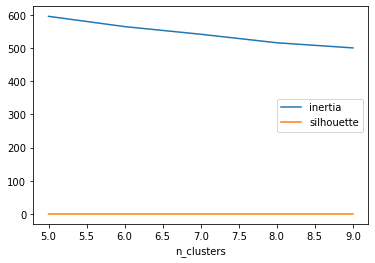

In [7]:
# Oputput inertia plot
plot = pd.DataFrame(cluster_summary).plot(
    x='n_clusters', y=['inertia', 'silhouette'])



<br><br>

### Produce clusters

In [7]:
n = 16

# Get features
feature_list = [
    'open_high1',
    'open_low1',
    'open_close1',
    'open_high2',
    'open_low2',
    'open_close2',
    'open3',
    'high3',
    'low3',
    'close3'
]
X = data.df[feature_list]
kmeans = KMeans(
    n_clusters=n,
    random_state=0,
)
kmeans = kmeans.fit(X)
labels = pd.DataFrame(kmeans.labels_, columns=['labels'])
data.df = data.df.join(labels, lsuffix='drop')
data.df = data.df[[h for h in list(data.df) if 'drop' not in h]]
data.df.sample(5)


,ticker_time,ticker_time_sec,ticker,ticker_interval,volume_base,volume,open2,high2,low2,close2,...,high1,low1,close1,open_high1,open_low1,open_close1,open_high2,open_low2,open_close2,labels
20604,2020-01-22 14:00:00+00:00,1579701600,BTC-USD,hour,817.86,7075201.72,8633.89,8656.27,8626.48,8641.45,...,8654.93,8620.50,8633.89,0.00034,-0.00364,-0.00209,0.00050,-0.00295,-0.00121,7
7271,2019-02-07 23:00:00+00:00,1549580400,BTC-USD,hour,856.53,2888011.00,3378.27,3379.61,3371.64,3375.33,...,3380.95,3374.15,3378.27,0.00132,-0.00069,0.00053,0.00093,-0.00143,-0.00034,7
304,2020-08-14 04:00:00+00:00,1597377600,BTC-USD,hour,906.71,10648164.01,11743.19,11771.94,11720.19,11742.10,...,11764.61,11688.81,11743.19,0.00158,-0.00488,-0.00024,0.00221,-0.00220,-0.00033,7
17831,2020-09-03 08:00:00+00:00,1599120000,BTC-USD,hour,1887.93,21551230.24,11412.59,11469.20,11365.96,11400.54,...,11431.18,11263.63,11412.59,0.01222,-0.00254,0.01060,0.01554,0.00650,0.00954,5
18189,2018-09-27 09:00:00+00:00,1538038800,BTC-USD,hour,2016.34,13061449.45,6458.76,6477.44,6456.40,6459.70,...,6460.36,6434.76,6458.76,0.00045,-0.00352,0.00021,0.00309,-0.00016,0.00035,7


In [8]:
# Output features and labels
data.to_db(
    project_id='algom-trading',
    destination_table='clustering.2candle_cluster_n{}'.format(n),
    if_exists='replace'
)

1it [00:12, 12.75s/it]


<br><br>

## Variance analysis

Run several clusters at _k_ and calculate basic metrics across each feature and future returns.


In [11]:
metric_list = [
    'volume_base',
    'open_high1',
    'open_low1',
    'open_close1',
    'open_high2',
    'open_low2',
    'open_close2',
    'open_high3',
    'open_low3',
    'open_close3',
    'open_high4',
    'open_low4',
    'open_close4',
    'open_high5',
    'open_low5',
    'open_close5',
    'open_high6',
    'open_low6',
    'open_close6',

    'ROR_n6',
    'ROR_n12',
    'ROR_n24',
    'ROR_n48',
    'ROR_n72',
    'ROR_n96',
    'ROR_n120',
    'ROR_n144',
    'ROR_n168',
]

In [12]:
def get_cluster_summary(df, k, metric_list, feature_list=None):

    # Get features
    feature_list = feature_list or [
        'open_high1',
        'open_low1',
        'open_close1',
        'open_high2',
        'open_low2',
        'open_close2',
        'open_high3',
        'open_low3',
        'open_close3',
        'open_high4',
        'open_low4',
        'open_close4',
        'open_high5',
        'open_low5',
        'open_close5',
        'open_high6',
        'open_low6',
        'open_close6',
    ]
    X = df[feature_list]
    kmeans = KMeans(
        n_clusters=k,
        random_state=0)
    kmeans = kmeans.fit(X)
    labels = pd.DataFrame(kmeans.labels_, columns=['labels'])
    df = df.join(labels, lsuffix='drop')
    df = df[[h for h in list(df) if 'drop' not in h]]

    # Output metric summary in dataframe
    # Iterate by metric/feature
    calc_list = ['count', 'min', 'mean', 'median', 'max', 'std', 'var', 'mad']
    metric_summary = pd.DataFrame()
    for metric in metric_list:
        stats = df.groupby(by=['labels'])[metric].agg(calc_list).reset_index()
        stats['inertia'] = kmeans.inertia_
        stats['variable'] = metric
        stats['k'] = k
        metric_summary = metric_summary.append(stats)
    return metric_summary


In [13]:
summary = pd.DataFrame()
for k in range(5, 101, 5):
    print('RUNNING: k={}'.format(k))
    tmp = get_cluster_summary(
        df=data.df, 
        k=k,
        metric_list=metric_list
    )
    tmp['type'] = '6 candle'
    summary = summary.append(tmp)


RUNNING: k=5
RUNNING: k=10
RUNNING: k=15
RUNNING: k=20
RUNNING: k=25
RUNNING: k=30
RUNNING: k=35
RUNNING: k=40
RUNNING: k=45
RUNNING: k=50
RUNNING: k=55
RUNNING: k=60
RUNNING: k=65
RUNNING: k=70
RUNNING: k=75
RUNNING: k=80
RUNNING: k=85
RUNNING: k=90
RUNNING: k=95
RUNNING: k=100


In [14]:
output = dataObject(summary)
output.to_db(
    project_id='algom-trading',
    destination_table='clustering_summary.6candle_cluster_summary',
    if_exists='replace'
)
summary.head()

1it [00:11, 11.44s/it]


,labels,count,min,mean,median,max,std,var,mad,inertia,variable,k,type
0,0,23074,0.1471,2119.936211,1540.020,42017.30,2042.418943,4.171475e+06,1279.658387,52.489502,volume_base,5,6 candle
1,1,1122,0.5561,6653.003960,5287.865,42382.36,5081.479944,2.582144e+07,3460.427533,52.489502,volume_base,5,6 candle
2,2,4698,0.0040,4640.284943,3402.870,60654.85,4366.381396,1.906529e+07,2796.290953,52.489502,volume_base,5,6 candle
3,3,868,4.3630,9455.155073,7565.580,47506.29,6960.250978,4.844509e+07,5070.242469,52.489502,volume_base,5,6 candle
4,4,6514,0.1806,3938.778516,3084.435,61787.67,3405.399108,1.159674e+07,2195.157745,52.489502,volume_base,5,6 candle


In [15]:
len(summary)

29400

In [16]:
# list(data.df)